In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [8]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [9]:
X.cp.unique()

array([3, 2, 1, 0], dtype=int64)

In [10]:
pd.get_dummies(X, columns=['cp'])

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_0,cp_1,cp_2,cp_3
0,63,1,145,233,1,0,150,0,2.3,0,0,1,0,0,0,1
1,37,1,130,250,0,1,187,0,3.5,0,0,2,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,2,0,2,0,1,0,0
3,56,1,120,236,0,1,178,0,0.8,2,0,2,0,1,0,0
4,57,0,120,354,0,1,163,1,0.6,2,0,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,1,123,1,0.2,1,0,3,1,0,0,0
299,45,1,110,264,0,1,132,0,1.2,1,0,3,0,0,0,1
300,68,1,144,193,1,1,141,0,3.4,1,2,3,1,0,0,0
301,57,1,130,131,0,1,115,1,1.2,1,1,3,1,0,0,0


In [11]:
X_encoded = pd.get_dummies(X, columns=['cp','restecg','slope','thal'])

In [12]:
X_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_0,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,0,...,1,0,0,1,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,0,...,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,0,...,1,0,0,0,0,1,0,0,1,0
3,56,1,120,236,0,178,0,0.8,0,0,...,0,1,0,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,...,0,1,0,0,0,1,0,0,1,0


In [13]:
y.unique()

array([1, 0], dtype=int64)

### Train Test Split

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.2)

## Fitting the DT model

In [15]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(random_state = 42) # setting random state because to get the same results after executing multiple times
clf_dt = clf_dt.fit(X_train, y_train)

[Text(671.8372641509435, 518.8909090909091, 'cp_0 <= 0.5\ngini = 0.496\nsamples = 242\nvalue = [110, 132]\nclass = Yes HD'),
 Text(459.29716981132077, 469.4727272727273, 'slope_1 <= 0.5\ngini = 0.335\nsamples = 127\nvalue = [27, 100]\nclass = Yes HD'),
 Text(350.0660377358491, 420.05454545454546, 'trestbps <= 182.0\ngini = 0.193\nsamples = 83\nvalue = [9, 74]\nclass = Yes HD'),
 Text(329.00943396226415, 370.6363636363636, 'thalach <= 168.5\ngini = 0.176\nsamples = 82\nvalue = [8, 74]\nclass = Yes HD'),
 Text(307.9528301886793, 321.21818181818185, 'ca <= 1.5\ngini = 0.287\nsamples = 46\nvalue = [8, 38]\nclass = Yes HD'),
 Text(236.8867924528302, 271.8, 'trestbps <= 152.0\ngini = 0.214\nsamples = 41\nvalue = [5, 36]\nclass = Yes HD'),
 Text(157.9245283018868, 222.38181818181818, 'thalach <= 167.5\ngini = 0.153\nsamples = 36\nvalue = [3, 33]\nclass = Yes HD'),
 Text(105.28301886792454, 172.96363636363634, 'chol <= 326.5\ngini = 0.111\nsamples = 34\nvalue = [2, 32]\nclass = Yes HD'),
 Text

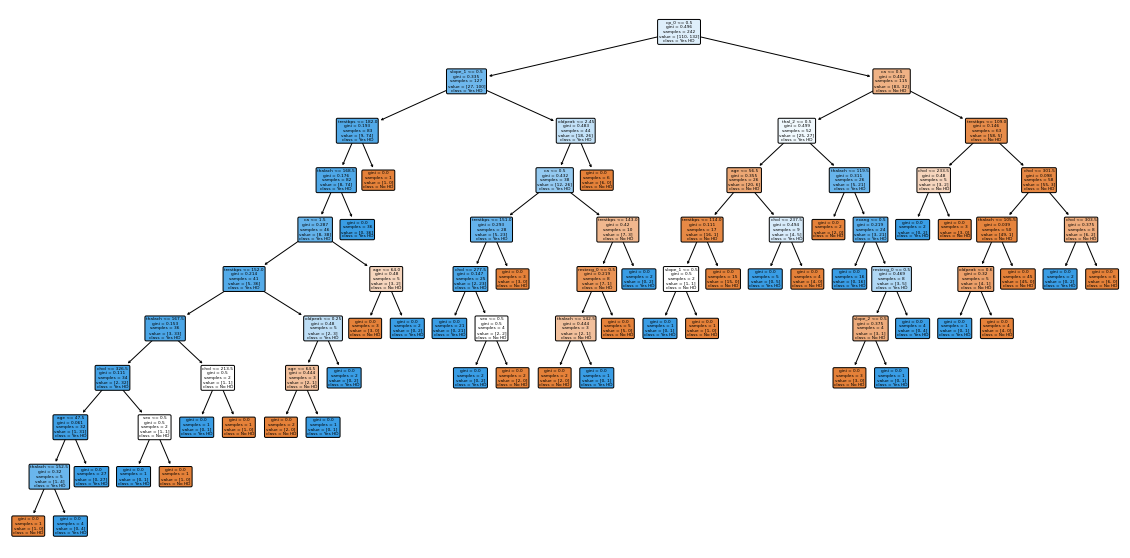

In [16]:
# plottind the decision tree

from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(clf_dt, filled =True, rounded = True, class_names = ['No HD','Yes HD'], feature_names = X_encoded.columns)

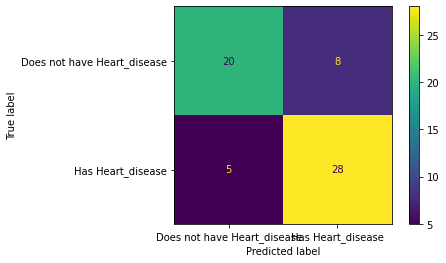

In [17]:
## checking the accuracy score 


from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf_dt, X_test, y_test, display_labels = ['Does not have Heart_disease', 'Has Heart_disease'])

* Of the patients that do not have heart disease 20+8 = 28 people that do not have heart disease is 20 (71%) were correctly classified.
* Of the patients that has heart disease 5+28 = 33 people that has heart disease is 28 (85%) were correctly classified.

In [18]:
# can we do it beteer but it overfits the data

# so we need to do a better model but it shoult not overfit the data

# ans is ==== pruning

## Cost Complexity Pruning

In [19]:

path = clf_dt.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas = path.ccp_alphas # extract the diffrent values of alpha that are available for this tree and build a pruned tree for each value of alpha
ccp_alphas = ccp_alphas[:-1] # excluding the last value of alpha (because this apha value is for the root only without having any branches)
ccp_alphas

array([0.        , 0.0036157 , 0.00378788, 0.00388916, 0.00404959,
       0.00451858, 0.00619835, 0.0074859 , 0.00750796, 0.00760331,
       0.00774793, 0.01012397, 0.0116815 , 0.01518268, 0.0176468 ,
       0.02004824, 0.0214825 , 0.03575969, 0.04555131])

In [20]:
len(ccp_alphas)

19

In [21]:
clf_dts = []
from sklearn.tree import DecisionTreeClassifier

for i in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state = 0, ccp_alpha= i)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)
    
clf_dts

[DecisionTreeClassifier(random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.003615702479338843, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.003787878787878788, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.003889158969372874, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0040495867768595055, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004518578243633675, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.006198347107438017, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.007485897940443397, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.00750795967583294, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.007603305785123966, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.007747933884297521, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.01012396694214876, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.011681500317863958, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.015182678284282564, random_state=0),
 DecisionTr

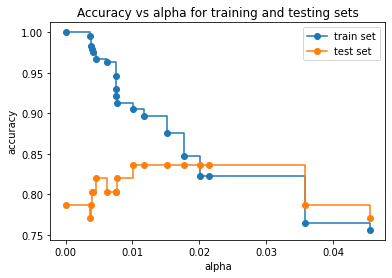

In [22]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker = 'o', label = 'train set', drawstyle = 'steps-post')
ax.plot(ccp_alphas, test_scores, marker = 'o', label = 'test set', drawstyle = 'steps-post')

ax.legend()
plt.show()


So we can take the alpha has 0.018 becuase in that region train and test has good accuracy score

## Cost Complexity Pruning (using Cross validation)

In [24]:
from sklearn.model_selection import cross_val_score

clf_dt = DecisionTreeClassifier(random_state = 42, ccp_alpha = 0.018)


scores = cross_val_score(clf_dt, X_train, y_train, cv = 5)
df = pd.DataFrame(data = {'tree': range(5), 'accuracy': scores})

df

,tree,accuracy
0,0,0.734694
1,1,0.775510
2,2,0.791667
3,3,0.791667
4,4,0.750000


<AxesSubplot:xlabel='tree'>

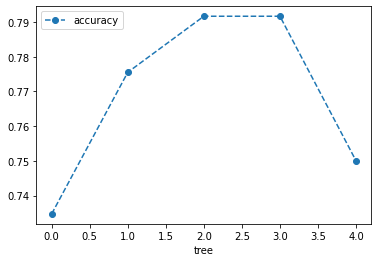

In [25]:
df.plot(x = 'tree', y = 'accuracy', marker = 'o', linestyle = '--')

In the above we have used one alpha and used cv to see the scores

In [26]:
# Now we are using cv to calculate the alpha 

alpha_loop_values = []
from sklearn.tree import DecisionTreeClassifier

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state = 0, ccp_alpha= ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv = 5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
alpha_results = pd.DataFrame(alpha_loop_values, columns= ['alpha', 'mean_accuracy', 'std'])


alpha_results


,alpha,mean_accuracy,std
0,0.000000,0.718537,0.048943
1,0.003616,0.718537,0.048943
2,0.003788,0.718537,0.048943
3,0.003889,0.718537,0.048943
4,0.004050,0.718537,0.048943
5,0.004519,0.718537,0.048943
6,0.006198,0.727041,0.022912
7,0.007486,0.702466,0.021177
8,0.007508,0.702466,0.021177
9,0.007603,0.702466,0.021177


<AxesSubplot:xlabel='alpha'>

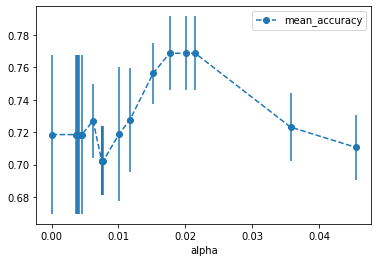

In [27]:
alpha_results.plot(x= 'alpha', y = 'mean_accuracy', yerr = 'std', marker = 'o', linestyle = '--')

Using the above graph we can find that instead of setting ccp_alpha = 0.018, if we can set something at ccp_alpha = 0.020048 to get the good score

So from the alpha_results dataframe we can see that at alpha 0.020048 we get the mean accuracy 0.768707

In [28]:
alpha_results[alpha_results['alpha'] > 0.02]

,alpha,mean_accuracy,std
15,0.020048,0.768707,0.022836
16,0.021482,0.768707,0.022836
17,0.035760,0.723129,0.021165
18,0.045551,0.710629,0.020030


# Busilding, Evaluating, Drawing, and Interpreting the Final Deicision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
clf_dt_pruned = DecisionTreeClassifier(random_state = 42, ccp_alpha = 0.021482) # setting random state because to get the same results after executing multiple times
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

[Text(558.0, 475.65000000000003, 'cp_0 <= 0.5\ngini = 0.496\nsamples = 242\nvalue = [110, 132]\nclass = Yes HD'),
 Text(279.0, 339.75, 'slope_1 <= 0.5\ngini = 0.335\nsamples = 127\nvalue = [27, 100]\nclass = Yes HD'),
 Text(139.5, 203.85000000000002, 'gini = 0.193\nsamples = 83\nvalue = [9, 74]\nclass = Yes HD'),
 Text(418.5, 203.85000000000002, 'gini = 0.483\nsamples = 44\nvalue = [18, 26]\nclass = Yes HD'),
 Text(837.0, 339.75, 'ca <= 0.5\ngini = 0.402\nsamples = 115\nvalue = [83, 32]\nclass = No HD'),
 Text(697.5, 203.85000000000002, 'thal_2 <= 0.5\ngini = 0.499\nsamples = 52\nvalue = [25, 27]\nclass = Yes HD'),
 Text(558.0, 67.94999999999999, 'gini = 0.355\nsamples = 26\nvalue = [20, 6]\nclass = No HD'),
 Text(837.0, 67.94999999999999, 'gini = 0.311\nsamples = 26\nvalue = [5, 21]\nclass = Yes HD'),
 Text(976.5, 203.85000000000002, 'gini = 0.146\nsamples = 63\nvalue = [58, 5]\nclass = No HD')]

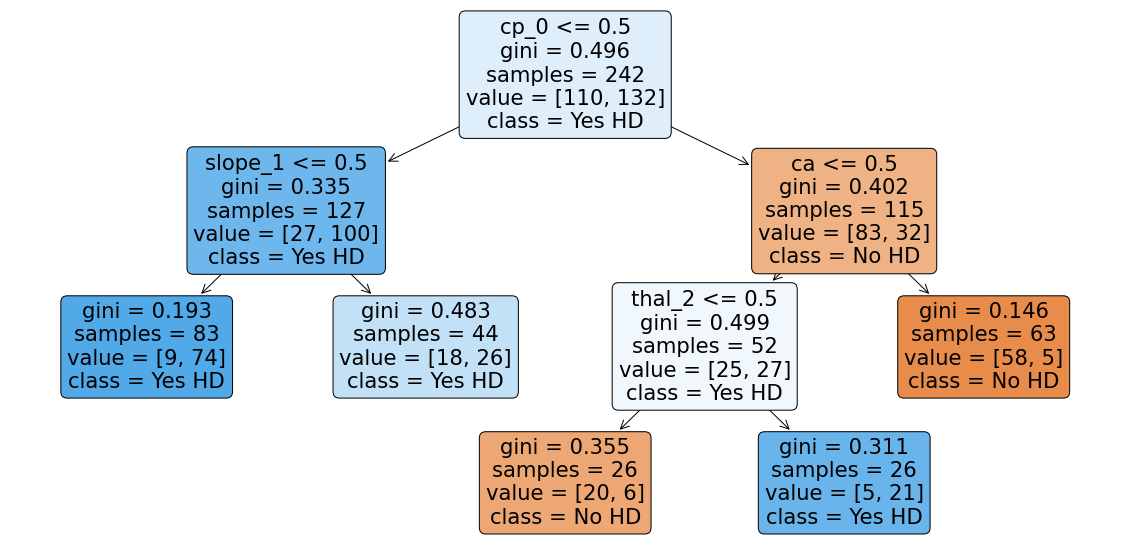

In [30]:
# plottind the decision tree

from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(clf_dt_pruned, filled =True, rounded = True, class_names = ['No HD','Yes HD'], feature_names = X_encoded.columns)

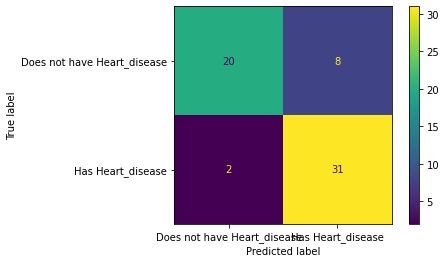

In [31]:
## checking the accuracy score 


from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf_dt_pruned, X_test, y_test, display_labels = ['Does not have Heart_disease', 'Has Heart_disease'])

So in the confusion matrix we can see that we have reduced the False Negative and False Positive values when compared to before confusrion matrix

* Of the patients that do not have heart disease 20+8 = 28 people that do not have heart disease is 20 (71%) were correctly classified.
* Of the patients that has heart disease 2+31 = 33 people that has heart disease is 31 (93%) were correctly classified.